In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jupyterthemes.jtplot as jt # using jupyter notebook theme
import sklearn.linear_model as ln
import csv
import math
jt.style(theme='gruvboxd')

### Step1 (explore data and visualization)

In [2]:
df=pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
df['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

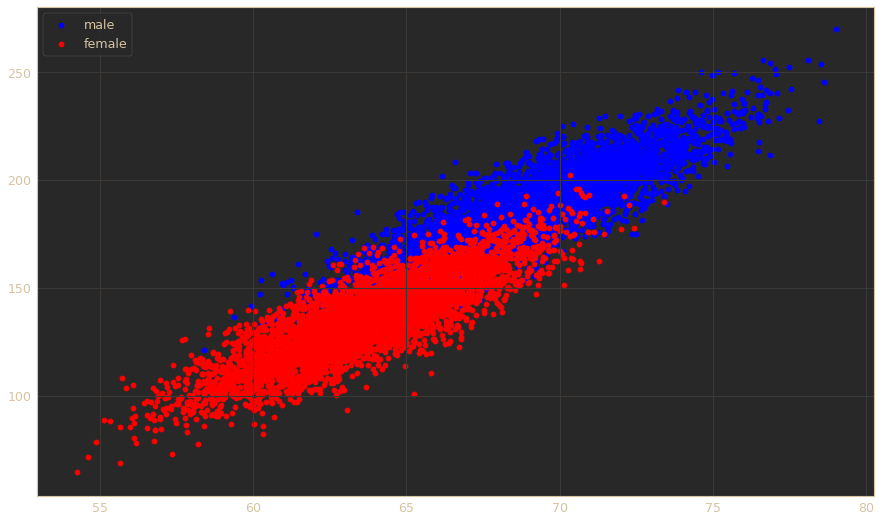

In [6]:
# visualise based on the gender
males =df[df['Gender']=='Male']
females =df[df['Gender']=='Female']
plt.figure(figsize=[15,9])
plt.scatter(males['Height'],males['Weight'],color ='blue',label='male')
plt.scatter(females['Height'],females['Weight'],color ='red',label='female')
plt.legend()
plt.show

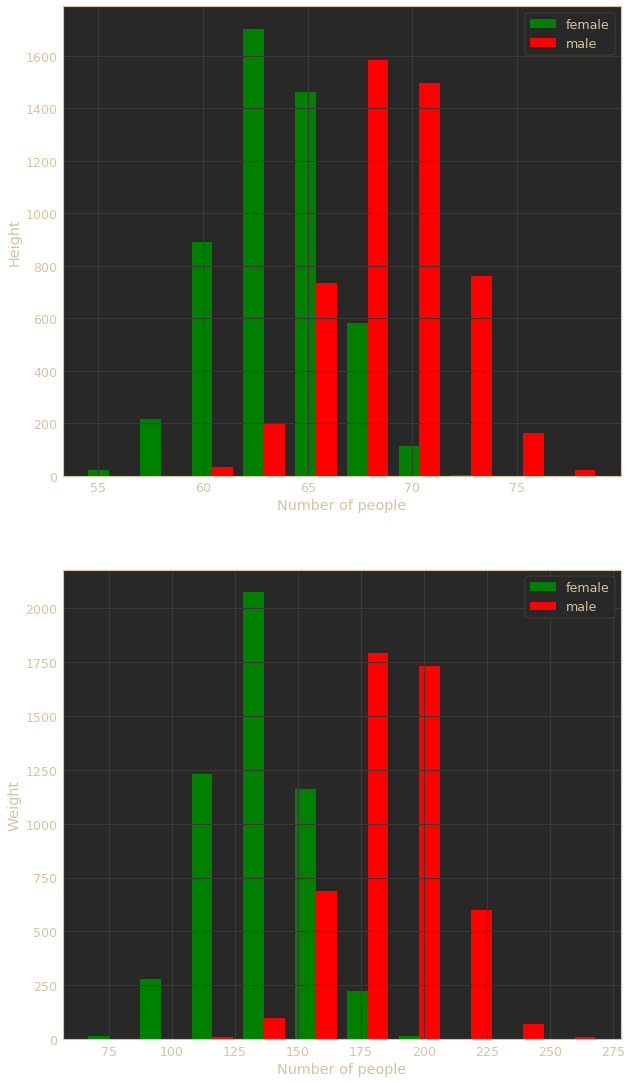

In [7]:
# visualise based on the weight and the height up to average value
males_height= (males['Height'])
females_height= (females['Height'])
males_weight= (males['Weight'])
females_weight= (females['Weight'])
plt.figure(figsize=[10,19])
plt.subplot(2,1,1)
plt.hist([females_height,males_height],color=['green','red'],label=['female','male'])
plt.xlabel('Number of people')
plt.ylabel('Height')
plt.legend()
plt.subplot(2,1,2)
plt.hist([females_weight,males_weight],color=['green','red'],label=['female','male'])
plt.xlabel('Number of people')
plt.ylabel('Weight')
plt.legend()
plt.show()

## Step2 Initially and Calculate loss function
### with  scikit learn

<function matplotlib.pyplot.show(*args, **kw)>

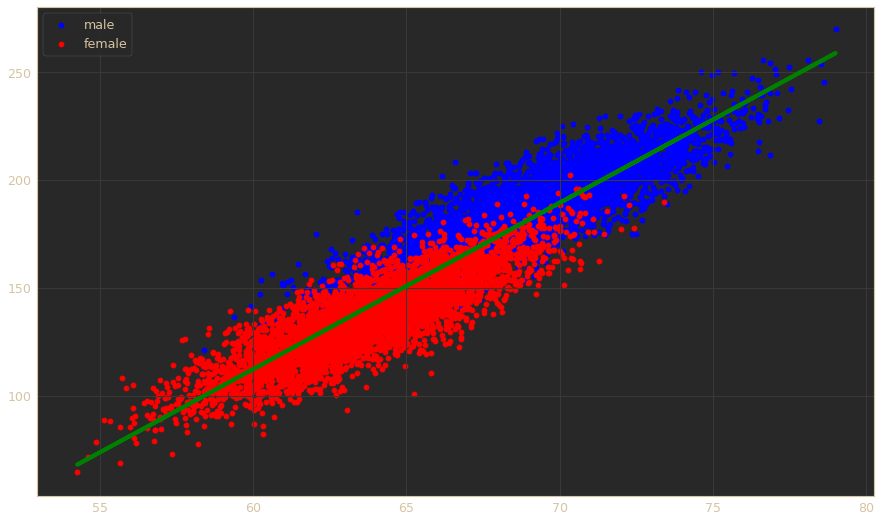

In [8]:
# Calculate with scikit learn
reg= ln.LinearRegression()

y1 = np.array(df['Weight']).reshape(10000,1)
x1 = np.array(df['Height']).reshape(10000,1)
reg.fit(x1,y1)
reg.coef_
reg.intercept_

males =df[df['Gender']=='Male']
females =df[df['Gender']=='Female']
plt.figure(figsize=[15,9])
plt.scatter(males['Height'],males['Weight'],color ='blue',label='male')
plt.scatter(females['Height'],females['Weight'],color ='red',label='female')
plt.plot(df['Height'],reg.predict(x1),color ='green',lineWidth=4)
plt.legend()
plt.show



In [9]:
print('''
from the scikit learn we get
''')
print('the slope is ',reg.coef_)
print('the intercept is',reg.intercept_)


from the scikit learn we get

the slope is  [[7.71728764]]
the intercept is [-350.73719181]


   # MODEL 2 ( find the intercept and the slope )
### $$SLOPE = \sum \big(x- \hat{x}\big) * \big(y-\hat{y}\big) \big/ \sum \big(x-\hat{x}\big)^2$$ 

### $$INTERCEPT= \hat{y} - \big(SLOPE*\hat{x}\big)$$

$ \hat{y} = y.mean() $

$ \hat{x} = x.mean() $

<function matplotlib.pyplot.show(*args, **kw)>

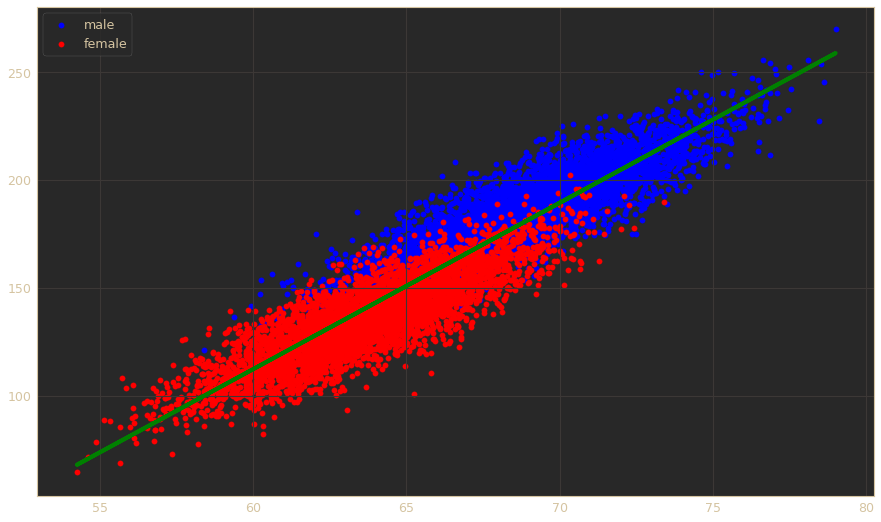

In [10]:
#y3 = np.array(df['Weight'])
#x3 = np.array(df['Height'])
def linear_regression (x,y):    
    slope = ((x-x.mean())* (y-y.mean())).sum() /((x-x.mean())**2).sum()
    intercept = y.mean() - (slope*x.mean())
    predict = (slope*x)+intercept
    return slope , intercept,predict

slope,intercept,predict =linear_regression(x1,y1)

plt.figure(figsize=[15,9])
plt.scatter(males['Height'],males['Weight'],color ='blue',label='male')
plt.scatter(females['Height'],females['Weight'],color ='red',label='female')
plt.plot(x1,predict,color ='green',lineWidth = 4)
plt.legend()
plt.show


In [11]:
print('''
from the building model we can get 
''')
print('the slope is ',slope)
print('the intercept is',intercept)


from the building model we can get 

the slope is  7.717287640785389
the intercept is -350.737191812137


In [12]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, 
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list